In [2]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/flagellar/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
import flg_preprocess
import os
importlib.reload(fls);

MainProcess


In [3]:
data = fls.load_all_train_data() + fls.load_all_extra_data()

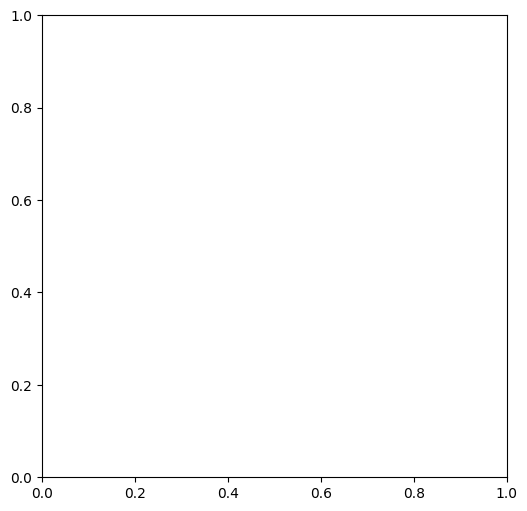

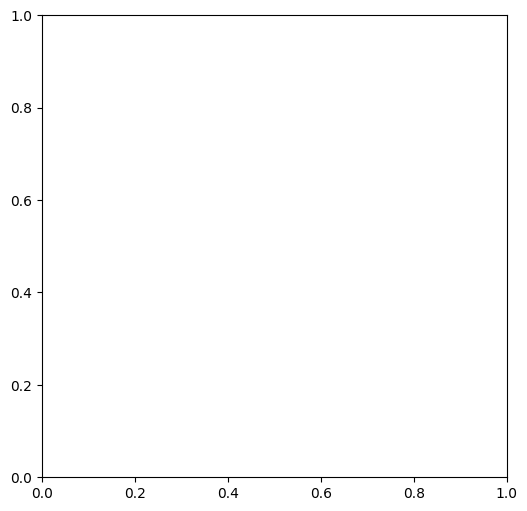

In [15]:
import pandas as pd
merged = fls.dill_load(fls.code_dir + '/bad_pos_labels.pickle')
#merged = pd.DataFrame(columns=['name', 'z', 'y', 'x', 'suspect'])
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import clear_output, display


sizes        = [5]
preprocessor = flg_preprocess.Preprocessor2()

# Create one figure & axes up front
fig, ax = plt.subplots(figsize=(6,6))

decisions = []

for d in data[:30]: 
    if d.name in merged['name'].values:
        continue
    for i_row in range(len(d.labels)):
        dd = copy.deepcopy(d)
        coords = np.array((np.round(d.labels['z'][i_row]).astype(int), np.round(d.labels['y'][i_row]).astype(int), np.round(d.labels['x'][i_row]).astype(int)))
        desired_slices = np.arange(coords[0]-sizes[0], coords[0]+sizes[0]+1)
        #desired_slices = desired_slices[desired_slices>=0]
        #desired_slices = desired_slices[desired_slices<dd.data_shape[0]]
        preprocessor.load_and_preprocess(dd, desired_original_slices=list(desired_slices))
        coords[0] = len(dd.slices_present)//2
        coords[1] = np.round(coords[1]*dd.resize_factor).astype(int)
        coords[2] = np.round(coords[2]*dd.resize_factor).astype(int)
    
        # Clear previous output & axes
        clear_output(wait=True)
        ax.clear()
    
        # Draw image + rectangle
        img = np.mean(dd.data, axis=0)
        ax.imshow(img, cmap='bone')
        x1, x2 = coords[2] - 50, coords[2] + 50
        y1, y2 = coords[1] - 50, coords[1] + 50
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1,
                                  alpha=0.2, facecolor='blue')
        ax.add_patch(rect)
        ax.set_title(f"Row {i_row}")
        ax.axis('off')
    
        # Display the figure in the cell
        display(fig)
        plt.pause(0.001)   # let the frontend catch up
    
        # Now get your user input
        
        decision = input(f"{d.name}: is this suspect? (y/n) ")
        i_row_merged=len(merged)
        merged.loc[i_row_merged,'name'] = d.name
        merged.loc[i_row_merged,'z'] = d.labels['z'][i_row]
        merged.loc[i_row_merged,'y'] = d.labels['y'][i_row]
        merged.loc[i_row_merged,'x'] = d.labels['x'][i_row]
        merged.loc[i_row_merged, 'suspect'] = 1.*(decision.strip().lower()=='y')

        fls.dill_save(fls.code_dir + '/bad_pos_labels.pickle', merged)

# (Optional) after loop you can keep the last figure up:
clear_output(wait=True)
display(fig)


In [14]:
d.name in merged['name']

False

In [13]:
d.name

'tomo_00e047'